# Network Robustness and Fragility: Percolation on Random Graphs
---

In [1]:
import PercolationAndRobustness as PAR
using Graphs
using Plots
using Colors

In [3]:
#Parameters
tau_arr = [2.4, 2.7, 3.0]
kappa = 30
N = 10^7

10000000

In [3]:
giant_component_result = []
kmax_result = []
percent_removed_result = []
for tau in tau_arr
    graph = PAR.Configuration_Generator(N, tau, kappa)
    max_degree = Δ(graph)
    data_count = 120
    kmax_arr = floor.(Int, LinRange(2, max_degree, data_count))
    giant_component_size_arr = []
    percent_removed_arr = []
    size = []
    for k in kmax_arr
        graph_clone = squash(graph)
        graph_clone, size_diff = PAR.Kmax_Cutoff(graph_clone, k)
        push!(percent_removed_arr, size_diff / N * 100)
        push!(giant_component_size_arr, PAR.large_component_size(graph_clone) / N)
    end
    push!(giant_component_result, giant_component_size_arr)
    push!(kmax_result, kmax_arr)
    push!(percent_removed_result, percent_removed_arr)
end

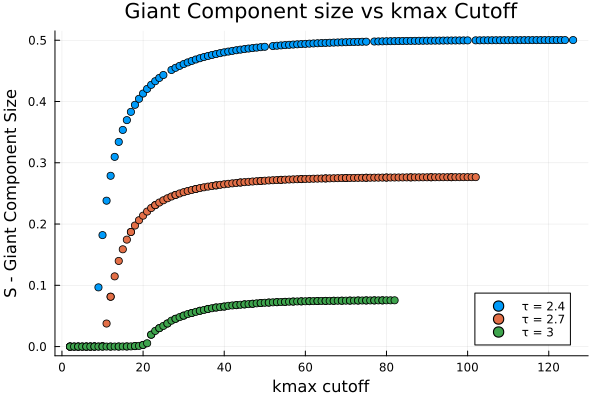

In [12]:
scatter(kmax_result, giant_component_result, title = "Giant Component size vs kmax Cutoff",
xlabel = "kmax cutoff", ylabel = "S - Giant Component Size", label = ["τ = 2.4" "τ = 2.7" "τ = 3"])

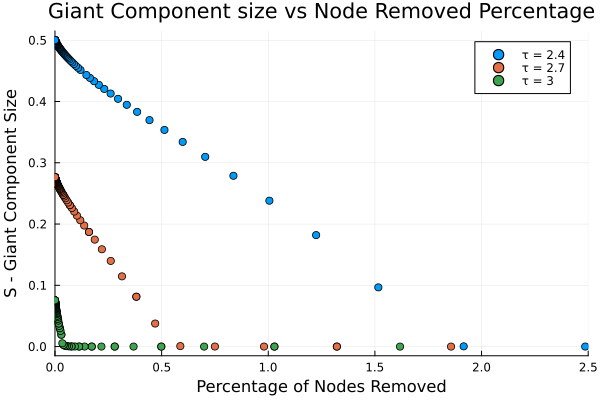

In [13]:
scatter(percent_removed_result, giant_component_result, title = "Giant Component size vs Node Removed Percentage",
xlabel = "Percentage of Nodes Removed", ylabel = "S - Giant Component Size", label = ["τ = 2.4" "τ = 2.7" "τ = 3"], xlims = (0, 2.5))

Probability of a random node being part of a cluster of size s:

In [18]:
tau = 2.5
kappa = 10
N = 10^7
q = 0.65
graph = PAR.random_remove(PAR.Configuration_Generator(N, tau, kappa), q)
components = PAR.component_size_distribution(graph)
component_sizes = sort(unique(components))
component_distribution = []
for i in component_sizes
    number = count(x->x==i, components)
    push!(component_distribution, number)
end
component_distribution = component_distribution ./ sum(component_distribution)

131-element Vector{Float64}:
 0.377746024803083
 0.441696549183578
 0.09525729850543024
 0.03511287957423838
 0.017148857136747825
 0.009545274310813938
 0.005920358387630795
 0.003992546845745441
 0.0026934592081605062
 0.0020718628421546622
 ⋮
 3.75133594451324e-7
 3.75133594451324e-7
 3.75133594451324e-7
 3.75133594451324e-7
 3.75133594451324e-7
 3.75133594451324e-7
 3.75133594451324e-7
 3.75133594451324e-7
 3.75133594451324e-7

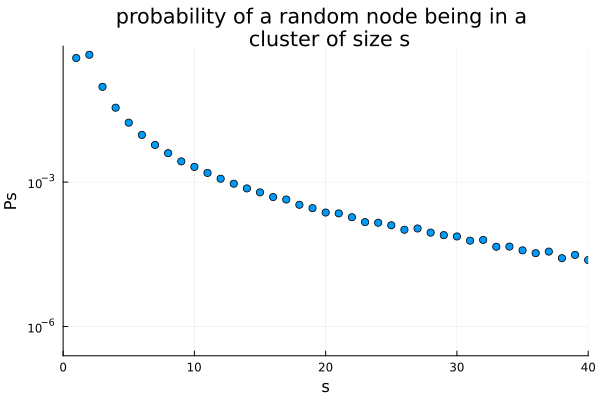

In [19]:
scatter(component_sizes, component_distribution, yaxis = :log, xlims = (0, 40),
    title = "probability of a random node being in a \n cluster of size s", xlabel = "s",
    ylabel = "Ps", legend = false)

Alternative Distributions

In [10]:
kappa_arr = [5, 10, 20]
N = 10^6

1000000

In [11]:
giant_component_result = []
kmax_result = []
percent_removed_result = []
for kappa in kappa_arr
    graph = PAR.Gaussian_Configuration_Generator(N, kappa)
    max_degree = Δ(graph)
    data_count = 120
    kmax_arr = floor.(Int, LinRange(2, max_degree, data_count))
    giant_component_size_arr = []
    percent_removed_arr = []
    size = []
    for k in kmax_arr
        graph_clone = squash(graph)
        graph_clone, size_diff = PAR.Kmax_Cutoff(graph_clone, k)
        push!(percent_removed_arr, size_diff / N * 100)
        push!(giant_component_size_arr, PAR.large_component_size(graph_clone) / N)
    end
    push!(giant_component_result, giant_component_size_arr)
    push!(kmax_result, kmax_arr)
    push!(percent_removed_result, percent_removed_arr)
end

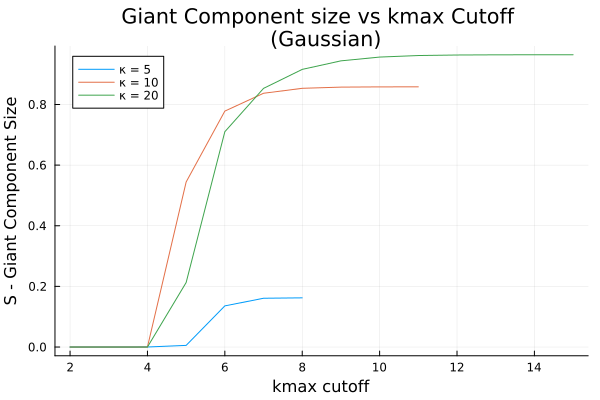

In [15]:
plot(kmax_result, giant_component_result, title = "Giant Component size vs kmax Cutoff \n (Gaussian)",
xlabel = "kmax cutoff", ylabel = "S - Giant Component Size", label = ["κ = 5" "κ = 10" "κ = 20"])

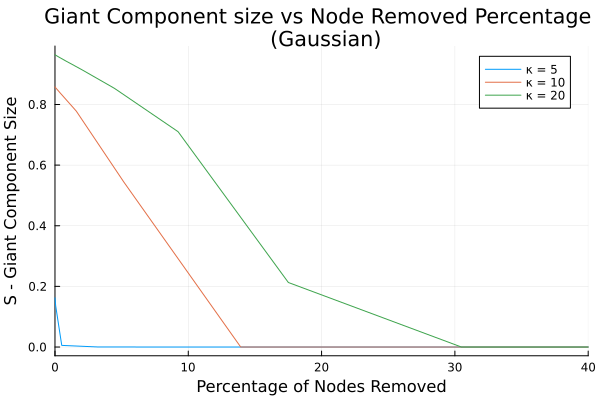

In [17]:
plot(percent_removed_result, giant_component_result, title = "Giant Component size vs Node Removed Percentage \n (Gaussian)",
xlabel = "Percentage of Nodes Removed", ylabel = "S - Giant Component Size", label = ["κ = 5" "κ = 10" "κ = 20"], xlims = (0, 40))